<a href="https://colab.research.google.com/github/Davidospina1000/Data-Integration/blob/main/2_Muestreo_de_Variables_Aleatorias_Montecarlo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

0. Se procede con la carga de las librerías

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Para conectar directamente con el drive
from google.colab import drive
drive.mount('/content/drive')

#La librería para los números aleatorios
import random as rnd

Mounted at /content/drive


1. Se procede con la carga del archivo de trabajo

**Descripción de las Variables**

Esta base de datos de eventos de pérdida, posee dos variables:
1. Frecuencia: Indica el número de eventos de pérdida por período de tiempo (semana, día, mes).

2. Severidad: Indica el costo de cada evento de pérdida.



Las pérdidas esperadas son:
 9.45111269614836
Las pérdidas no esperadas son:
 4.85836049807418
El valor de la póliza de aseguramiento:
 0.2656083


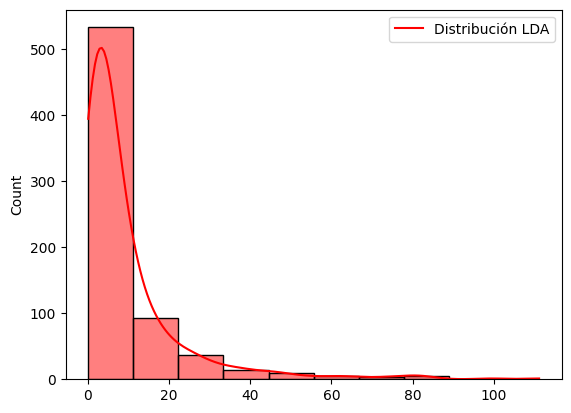

In [ ]:
nxl='/content/drive/MyDrive/BUSINESS INTELLIGENCE/Integración de datos y prospectiva/3. FallasTecnologicas.xlsx'
XDB=pd.read_excel(nxl, sheet_name=0)
XDB.head(100)

Xf=XDB.iloc[:,3]
Xs=XDB.iloc[:,4]
LDA=Xf*Xs

u=np.mean(LDA) #Límite superior de las pérdidas esperadas (Zona 1)
OpVar=np.percentile(LDA, 0.999) #Valor Asegurado OpVar (Zona 3)
PNE=(u+OpVar)/2 #Pérdidas esperadas (Zona 2)

print("Las pérdidas esperadas son:\n", u)
print("Las pérdidas no esperadas son:\n", PNE)
print("El valor de la póliza de aseguramiento:\n", OpVar)

plt.figure()
sns.histplot(LDA, bins=10, kde=True, color='red')
plt.legend(['Distribución LDA'])
plt.show()


2. Se procede con el muestreo de la variable



In [ ]:
counts,bin_edges=np.histogram(LDA, bins=10)

LI=bin_edges[:-1]      #Límites inferiores
LS=bin_edges[1:]       #Límites superiores
mc=(LI+LS)/2           #Marcas de clase

pdf=counts/sum(counts) #Nos entrega la frecuencia relativa
                       #Porcentaje de datos por intervalos

cdf=np.cumsum(pdf)     #Construimos la ruleta
                       #El acumulado de las probabilidades

df=pd.DataFrame(np.column_stack((LI,LS,mc,pdf,cdf)))
df.columns=['LI','LS','mc','pdf','cdf']
df.head(10)

,LI,LS,mc,pdf,cdf
0,0.14230,11.23637,5.689335,0.760342,0.760342
1,11.23637,22.33044,16.783405,0.132668,0.893010
2,22.33044,33.42451,27.877475,0.052782,0.945792
3,33.42451,44.51858,38.971545,0.019971,0.965763
4,44.51858,55.61265,50.065615,0.012839,0.978602
5,55.61265,66.70672,61.159685,0.007133,0.985735
6,66.70672,77.80079,72.253755,0.004280,0.990014
7,77.80079,88.89486,83.347825,0.007133,0.997147
8,88.89486,99.98893,94.441895,0.001427,0.998573
9,99.98893,111.08300,105.535965,0.001427,1.000000


3. Se procede con el muestreo de la variable a una confiabilidad del 99%

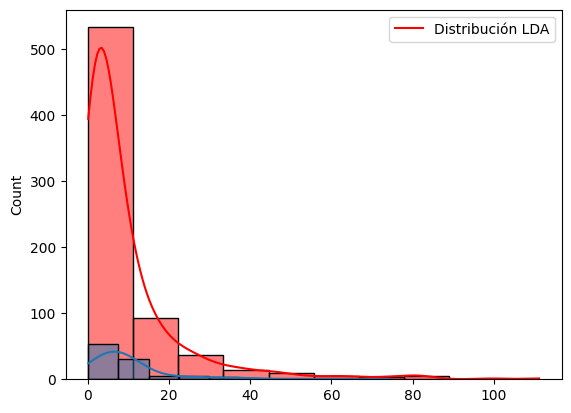

In [ ]:
TI = LS[0]-LI[0] #Tamaño del intervalo

#Confiabilidad del 99% - 100 datos
LDAm=np.zeros((100,1))

for i in range(100):
  print("iteración", i)
  aleatorio=rnd.random()
  print("El aleatorio es:", aleatorio)
  print("La lista de números es:\n",cdf)
  print((aleatorio<cdf))
  Intervalo=Intervalo=np.array(np.where((aleatorio<cdf)))
  print("El intervalo de trabajo es:", Intervalo[0,0])
  print("Los límites inferiores son:\n", LI)
  aleatorio2=rnd.random()
  print("El intervalo seleccionado es:\n", LI[Intervalo[0,0]])
  LDAm[i]=LI[Intervalo[0,0]] + TI*aleatorio2
  print("El valor muestreado es:", LDAm[i])

plt.figure()
sns.histplot(LDA, bins=10, kde=True, color='red')
sns.histplot(LDAm, bins=10, kde=True, color='green')
plt.legend(['Distribución LDA'])
plt.show()


**Análisis de resultados**

La base de datos utilizada para este estudio posee un total de 701 datos de eventos de riesgo semanales en transacciones faillidas en una entidad Fintech. Los datos presentaron una media, una desviación, así como un coeficiente de asimetría, y coeficiente de curtosis.

Luego, del muestreo a tres confiabilidades del 99% (100), 99,9% (1000) y 99,99% (10000), los valores de asimetría encontrados para cada confiabilidad fueron: cas100, cas1000, cas10000, muy similares o fueron muy diferentes a los valores de los datos originales, cual coeficiente de asimetrpia fue mas parecido al de los datos originales, esto mismo de debe hacer para el coeficiente de curtosis. Tanto los datos originales, como los datos muestreados responden de acuerdo con su coeficiente de asimetría y su coeficiente de curtosis a distribuciones tales y tales. Es importante mencionar que si los coeficientes de asimetría fueron los positivos, esto es indicador de pérdidas esperadas mucho más altas, y pérdidas catastróficas mucho menores (OpVar).